<a href="https://colab.research.google.com/github/Udhay2898/Risk-Factor-Analysis-for-Identifying-Fraudulent-Firms/blob/Master/Risk%20Factor%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Risk-Based Fraud Detection in Firms Using Python**

**Project description:**

Please read the Data Set Information section to learn about this dataset.
Data description is also provided for thi dataset.

Read data into Jupyter notebook, use pandas to import data into a data frame
Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

**Regression Task:**

Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results.

Then use cross validation to find average training and testing score.

Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels.


**Data Set Information:**

This dataset is taken from a research explained here.

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

There are two csv files to present data. Please merge these two datasets into one dataframe. All the steps should be done in Python. Please don't make any changes in csv files. Consider Audit_Risk as target columns for regression tasks, and Risk as the target column for classification tasks.

**Attribute Information:**

Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc. After in-depth interview with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records.

**libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Using pandas reading the audit_risk and trial.csv**

In [3]:
audit_risk_df = pd.read_csv("/content/drive/MyDrive/Data Sets/audit_risk.csv")
audit_risk_df.sample(3)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
259,2.72,12,0.77,0.2,0.154,0.0000,0.2,0.0000,0.7700,5.0,...,0.4,0,0.2,0.0,2.0,2.4740,0.4,0.5,0.4948,0
626,55.57,6,0.00,0.2,0.000,0.0300,0.2,0.0060,0.0300,5.0,...,0.4,0,0.2,0.0,2.0,1.4060,0.4,0.5,0.2812,0
736,55.57,15,0.40,0.2,0.080,0.0025,0.2,0.0005,0.4025,5.0,...,0.4,0,0.2,0.0,2.0,1.4805,0.4,0.5,0.2961,0


In [4]:
trial_df = pd.read_csv("/content/drive/MyDrive/Data Sets/trial.csv")
trial_df.sample(3)

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
500,21.61,8,0.80,2,0.82,2,1.62,5.0,2,1.32,2,2,0,2,0,2,2.0,0
438,1.85,32,7.09,6,1.95,4,9.04,5.0,2,0.00,2,2,0,2,0,2,3.0,1
603,55.57,2,1.24,4,2.27,6,3.51,5.0,2,0.00,2,6,0,2,0,2,3.8,1


In [5]:
audit_risk_df.rename(columns={'PROB': 'PROB1'}, inplace=True)

In [6]:
for column in audit_risk_df.columns:
  unique_value = audit_risk_df[column].unique()
  print(f"{column} :\n {unique_value}\n")

Sector_score :
 [ 3.89  3.41  2.72  2.37  1.99  1.85  2.36  2.34 15.56 17.68 21.61 59.85
 55.57]

LOCATION_ID :
 ['23' '6' '7' '8' '13' '37' '24' '3' '4' '14' '5' '20' '19' '21' '22' '9'
 '11' '12' '29' '30' '38' '31' '2' '32' '16' '33' '15' '36' '34' '18' '25'
 '39' '27' '35' '40' '41' '42' '1' '28' 'LOHARU' 'NUH' 'SAFIDON' '43' '44'
 '17']

PARA_A :
 [4.180e+00 0.000e+00 5.100e-01 1.100e+00 8.500e+00 8.400e+00 3.980e+00
 5.430e+00 1.538e+01 5.470e+00 1.090e+00 1.950e+00 8.540e+00 1.810e+00
 4.860e+00 6.260e+00 2.000e-02 5.310e+00 9.400e-01 5.780e+00 7.420e+00
 6.850e+00 2.400e+00 9.010e+00 1.195e+01 7.970e+00 6.200e-01 1.320e+00
 2.950e+00 1.970e+00 6.320e+00 1.404e+01 6.670e+00 1.260e+00 4.760e+00
 8.810e+00 1.392e+01 1.070e+00 1.000e+01 4.240e+00 1.227e+01 1.270e+01
 1.990e+00 5.000e-02 7.148e+01 7.400e-01 8.460e+00 4.200e-01 1.000e-02
 5.370e+00 4.930e+00 1.220e+00 1.572e+01 4.950e+00 1.190e+00 6.470e+00
 1.330e+00 2.570e+00 7.700e-01 5.230e+00 6.590e+00 7.180e+00 1.000e+00
 2.630

In [7]:
print(audit_risk_df.columns)
print(trial_df.columns)

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB1', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')
Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B',
       'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk'],
      dtype='object')


**After reading the two datasets the following observations were made :**
**Detection_Risk is a constant value**
Dropping the Detection Risk column as it has a variance of zero.



In [8]:
audit_risk_df = audit_risk_df.drop("Detection_Risk", axis = 1)

SCORE_A and SCORE_B in trial_df are 10* Score_A and 10*Score_B of audit_risk_df

In [9]:
trial_df.head(2)

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0


In [10]:
audit_risk_df.head(2)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,PROB1,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5108,0


In [11]:
audit_risk_df["Money_Value"].head(2)

,Money_Value
0,3.38
1,0.94


If the Score_A and Score_B values are adjusted, all common columns except 'Risk' hold the same value with the df observations in the same sequence.

**Common columns:**

In [12]:
c_cols = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'TOTAL', 'numbers', 'Money_Value', 'History', 'Score', 'Risk']


**Columns in trial_df but not in audit_risk_df:**

In [13]:
only_in_trial_cols = ['Marks', 'MONEY_Marks', 'District', 'Loss', 'LOSS_SCORE', 'History_score']

In [14]:
audit_risk_df["Score_A"] = audit_risk_df["Score_A"]*10
audit_risk_df["Score_B"] = audit_risk_df["Score_B"]*10

In [15]:
c_with_risk_cols = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'TOTAL', 'numbers', 'Money_Value', 'History','Score', 'Risk']
c_without_risk_cols = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'TOTAL', 'numbers', 'Money_Value', 'History','Score']
c_with_risk_cols_upper = [x.upper() for x in c_with_risk_cols]
c_without_risk_cols_upper = [x.upper() for x in c_without_risk_cols]

audit_names = audit_risk_df.columns
audit_names_upper =  [x.upper() for x in audit_names]
audit_risk_df.columns = audit_names_upper

trial_names = trial_df.columns
trial_names_upper =  [x.upper() for x in trial_names]
trial_df.columns = trial_names_upper

In [16]:
# c_with_risk_cols will result in an inner merge (~580 observations on dropping duplicates)
risk_df = audit_risk_df.merge(trial_df, on=c_without_risk_cols_upper)
risk_df.shape

(810, 33)

In [17]:
risk_df = risk_df.drop_duplicates()
risk_df.shape

(763, 33)

In [18]:
risk_df.columns

Index(['SECTOR_SCORE', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB1', 'RISK_E',
       'HISTORY', 'PROB', 'RISK_F', 'SCORE', 'INHERENT_RISK', 'CONTROL_RISK',
       'AUDIT_RISK', 'RISK_x', 'MARKS', 'MONEY_MARKS', 'DISTRICT', 'LOSS',
       'LOSS_SCORE', 'HISTORY_SCORE', 'RISK_y'],
      dtype='object')

**Checking for the null values in the final merged data**

In [19]:
risk_df.isna().any()

,0
SECTOR_SCORE,False
LOCATION_ID,False
PARA_A,False
SCORE_A,False
RISK_A,False
PARA_B,False
SCORE_B,False
RISK_B,False
TOTAL,False
NUMBERS,False


In [20]:
##Central Imputation

risk_df['MONEY_VALUE'] = risk_df["MONEY_VALUE"].fillna(risk_df["MONEY_VALUE"].mean())

risk_df.isnull().any()

,0
SECTOR_SCORE,False
LOCATION_ID,False
PARA_A,False
SCORE_A,False
RISK_A,False
PARA_B,False
SCORE_B,False
RISK_B,False
TOTAL,False
NUMBERS,False


**Type conversion**

Location ID that holds three string values and rest in the form of numeric values is a categorical attribute

In [21]:
risk_df = risk_df.copy()

# Check type conversions
risk_df.dtypes

,0
SECTOR_SCORE,float64
LOCATION_ID,object
PARA_A,float64
SCORE_A,float64
RISK_A,float64
PARA_B,float64
SCORE_B,float64
RISK_B,float64
TOTAL,float64
NUMBERS,float64


In [22]:
risk_df["LOCATION_ID"]= risk_df["LOCATION_ID"].replace("LOHARU", 45)
risk_df["LOCATION_ID"]= risk_df["LOCATION_ID"].replace("NUH", 46)
risk_df["LOCATION_ID"]= risk_df["LOCATION_ID"].replace("SAFIDON", 47)

In [23]:
risk_df["LOCATION_ID"].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 45, 46, 47, '43', '44', '17'],
      dtype=object)

**Removing Outliers**

Analyzation of the outliers and removing them.

In [24]:
risk_df.describe()

,SECTOR_SCORE,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,SCORE_B.1,...,CONTROL_RISK,AUDIT_RISK,RISK_x,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK_y
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,...,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,19.721311,2.491298,3.538663,1.373919,10.983474,3.150721,6.441822,13.442532,5.068807,0.224115,...,0.574574,7.284109,0.398427,2.241153,2.925295,2.508519,0.030144,2.062910,2.170380,0.635649
std,24.132399,5.718259,1.743985,3.465152,50.489113,1.705967,30.316831,51.719679,0.266546,0.080974,...,0.447253,38.985618,0.489895,0.809740,1.606557,1.230994,0.185804,0.378178,0.685288,0.481563
min,1.850000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.280000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.260000,2.000000,0.052000,0.000000,2.000000,0.000000,0.590000,5.000000,0.200000,...,0.400000,0.318600,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.900000,2.000000,0.180000,0.440000,2.000000,0.088000,1.420000,5.000000,0.200000,...,0.400000,0.590000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.000000
75%,55.570000,2.515000,6.000000,1.509000,4.365000,4.000000,2.104000,7.990000,5.000000,0.200000,...,0.400000,3.452800,1.000000,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000,1.000000
max,59.850000,85.000000,6.000000,51.000000,1264.630000,6.000000,758.778000,1268.910000,9.000000,0.600000,...,5.800000,961.514400,1.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000,1.000000


Here in the above description it is observed that some of the columns like PARA_B, TOTAL, RSIK_B are having the outliers as their respective maximum values are greater than the value of their 3rd quartile. Hence there are outliers present for these columns.

{'whiskers': [<matplotlib.lines.Line2D at 0x7c6aca0dc670>,
 'caps': [<matplotlib.lines.Line2D at 0x7c6aca0dcca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c6aca0dfcd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c6aca0dd180>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c6aca0dd630>],
 'means': []}

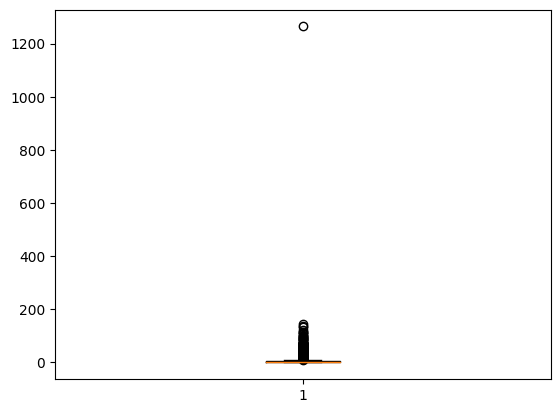

In [25]:
plt.boxplot(risk_df['PARA_B'])

Here we observe that there is only one observation which is the outlier for the column PARA_B.

In [26]:
risk_df[risk_df['PARA_B']==1264.630000]

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,CONTROL_RISK,AUDIT_RISK,RISK_x,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK_y
241,2.72,2,4.28,6.0,2.568,1264.63,6.0,758.778,1268.91,5.5,...,2.4,961.5144,1,4,6,6,0,2,6,1


In [27]:
risk_df.shape

(763, 33)

In [28]:
outlier =risk_df[risk_df.PARA_B != 1264.630000]

In the below boxplot it is observed that there are no more outliers for PARA_B column

{'whiskers': [<matplotlib.lines.Line2D at 0x7c6ac80283a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c6ac80288e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c6ac8028100>],
 'medians': [<matplotlib.lines.Line2D at 0x7c6aca082290>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c6ac8028a90>],
 'means': []}

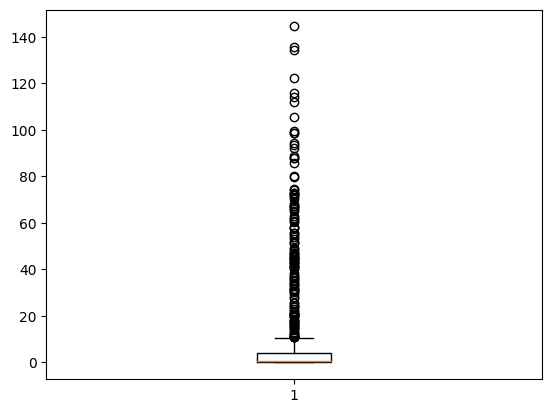

In [29]:
plt.boxplot(outlier['PARA_B'])

In [30]:
outlier[['MONEY_VALUE','RISK_D']].describe()

,MONEY_VALUE,RISK_D
count,762.000000,762.000000
mean,14.320450,8.370946
std,67.127781,40.310310
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.110000,0.021000
75%,5.965000,2.309000
max,935.030000,561.018000


**Removing the rest of the outliers**

In [31]:
outlier[(outlier['INHERENT_RISK'] == 622.838000) | (outlier['TOTAL'] == 191.360000) | (outlier['MONEY_VALUE'] == 935.030000) |(outlier['RISK_D'] == 561.018000)]

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,CONTROL_RISK,AUDIT_RISK,RISK_x,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK_y
39,3.89,19,7.97,6.0,4.782,17.18,6.0,10.308,25.15,5.0,...,0.4,115.5016,1,2,6,2,0,2,2,1
344,1.99,2,57.03,6.0,34.218,134.33,6.0,80.598,191.36,5.0,...,0.4,124.5676,1,2,6,2,0,2,2,1


In [32]:
final_df = outlier[(outlier['INHERENT_RISK'] != 622.838000) & (outlier['TOTAL'] != 191.360000) & (outlier['MONEY_VALUE'] != 935.030000) & (outlier['RISK_D'] != 561.018000)]
final_df.sample(3)

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,CONTROL_RISK,AUDIT_RISK,RISK_x,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK_y
704,55.57,9,0.26,2.0,0.052,0.0021,2.0,0.00042,0.2621,5.0,...,0.4,0.290484,0,2,2,2,0,2,2,0
553,59.85,29,0.03,2.0,0.006,0.0000,2.0,0.00000,0.0300,5.0,...,0.4,0.330000,0,2,2,2,0,2,2,0
610,55.57,12,0.38,2.0,0.076,0.0900,2.0,0.01800,0.4700,5.0,...,0.4,0.298800,0,2,2,2,0,2,2,0


{'whiskers': [<matplotlib.lines.Line2D at 0x7c6ac7ea5990>,
 'caps': [<matplotlib.lines.Line2D at 0x7c6ac7ea5ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c6ac7ea56f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c6ac7ea6410>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c6ac7ea66b0>],
 'means': []}

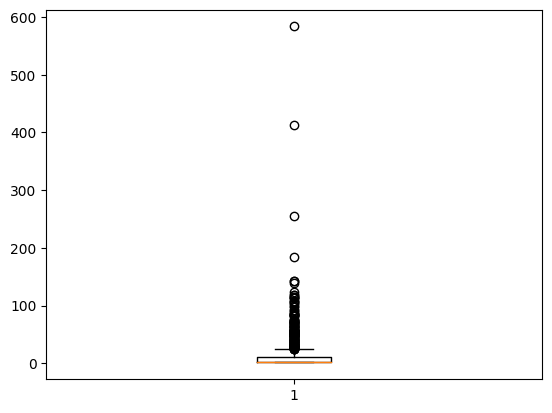

In [33]:
plt.boxplot(final_df['INHERENT_RISK'])

In [34]:
final_df.shape

(760, 33)

Here it is observed that on merging the two dataframes there would be two columns formed for the risk as the risk columns and values are different for both the dataframes. Hence by performing the OR operation the RISK column is built.

In [35]:
final_df['RISK'] = final_df['RISK_x'] | final_df['RISK_y']

<ipython-input-35-34b1c04b6139>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['RISK'] = final_df['RISK_x'] | final_df['RISK_y']


In [36]:
final_df = final_df.drop(['RISK_x','RISK_y'],axis=1)
final_df

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,INHERENT_RISK,CONTROL_RISK,AUDIT_RISK,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK
0,3.89,23,4.18,6.0,2.508,2.50,2.0,0.500,6.68,5.0,...,8.574,0.4,1.7148,2,2,2,0,2,2,1
1,3.89,6,0.00,2.0,0.000,4.83,2.0,0.966,4.83,5.0,...,2.554,0.4,0.5108,2,2,2,0,2,2,0
2,3.89,6,0.51,2.0,0.102,0.23,2.0,0.046,0.74,5.0,...,1.548,0.4,0.3096,2,2,2,0,2,2,0
3,3.89,6,0.00,2.0,0.000,10.80,6.0,6.480,10.80,6.0,...,17.530,0.4,3.5060,6,6,2,0,2,2,1
4,3.89,6,0.00,2.0,0.000,0.08,2.0,0.016,0.08,5.0,...,1.416,0.4,0.2832,2,2,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,55.57,18,0.75,2.0,0.150,0.45,2.0,0.090,1.20,5.0,...,1.640,0.4,0.3280,2,2,2,0,2,2,0
806,55.57,16,0.47,2.0,0.094,0.37,2.0,0.074,0.84,5.0,...,1.568,0.4,0.3136,2,2,2,0,2,2,0
807,55.57,14,0.24,2.0,0.048,0.04,2.0,0.008,0.28,5.0,...,1.456,0.4,0.2912,2,2,2,0,2,2,0
808,55.57,18,0.20,2.0,0.040,0.00,2.0,0.000,0.20,5.0,...,1.440,0.4,0.2880,2,2,2,0,2,2,0


In [37]:
final_df.describe()

,SECTOR_SCORE,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,SCORE_B.1,...,INHERENT_RISK,CONTROL_RISK,AUDIT_RISK,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,...,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,19.787842,2.409974,3.528947,1.324648,9.163488,3.139474,5.349245,11.541094,5.068421,0.223947,...,15.393907,0.572632,5.731831,2.239474,2.913158,2.505263,0.030263,2.063158,2.165789,0.634211
std,24.156673,5.372002,1.740536,3.257894,21.567462,1.699886,12.982757,23.734227,0.266590,0.080873,...,36.681740,0.443116,17.036510,0.808727,1.598034,1.226615,0.186161,0.378904,0.672351,0.481968
min,1.850000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,5.000000,0.200000,...,1.400000,0.400000,0.280000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.257500,2.000000,0.051500,0.000000,2.000000,0.000000,0.587500,5.000000,0.200000,...,1.592000,0.400000,0.318400,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.900000,2.000000,0.180000,0.435000,2.000000,0.087000,1.420000,5.000000,0.200000,...,2.228000,0.400000,0.586000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.000000
75%,55.570000,2.482500,6.000000,1.489500,4.170000,4.000000,1.995000,7.767500,5.000000,0.200000,...,10.782000,0.400000,3.262500,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000,1.000000
max,59.850000,85.000000,6.000000,51.000000,144.390000,6.000000,86.634000,148.230000,9.000000,0.600000,...,583.688000,5.800000,222.009600,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000,1.000000


In [38]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 0 to 809
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SECTOR_SCORE   760 non-null    float64
 1   LOCATION_ID    760 non-null    object 
 2   PARA_A         760 non-null    float64
 3   SCORE_A        760 non-null    float64
 4   RISK_A         760 non-null    float64
 5   PARA_B         760 non-null    float64
 6   SCORE_B        760 non-null    float64
 7   RISK_B         760 non-null    float64
 8   TOTAL          760 non-null    float64
 9   NUMBERS        760 non-null    float64
 10  SCORE_B.1      760 non-null    float64
 11  RISK_C         760 non-null    float64
 12  MONEY_VALUE    760 non-null    float64
 13  SCORE_MV       760 non-null    float64
 14  RISK_D         760 non-null    float64
 15  DISTRICT_LOSS  760 non-null    int64  
 16  PROB1          760 non-null    float64
 17  RISK_E         760 non-null    float64
 18  HISTORY        

In [39]:
final_df.columns

Index(['SECTOR_SCORE', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB1', 'RISK_E',
       'HISTORY', 'PROB', 'RISK_F', 'SCORE', 'INHERENT_RISK', 'CONTROL_RISK',
       'AUDIT_RISK', 'MARKS', 'MONEY_MARKS', 'DISTRICT', 'LOSS', 'LOSS_SCORE',
       'HISTORY_SCORE', 'RISK'],
      dtype='object')

It is observed that District loss and district have the same values and same affect on the target so dropping one of the two attributes (which is DISTRICT) is done. It is also observed that MONEY_Marks and Score_MV differ by a constant factor which is the multiplication of 10 (i.e., SCORE_MV*10 is \MONEY_MARKS), so dropping the MONEY_MARKS attribute.

In [40]:
final_df = final_df.drop(['MONEY_MARKS','DISTRICT'],axis=1)
final_df.columns

Index(['SECTOR_SCORE', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB1', 'RISK_E',
       'HISTORY', 'PROB', 'RISK_F', 'SCORE', 'INHERENT_RISK', 'CONTROL_RISK',
       'AUDIT_RISK', 'MARKS', 'LOSS', 'LOSS_SCORE', 'HISTORY_SCORE', 'RISK'],
      dtype='object')

**Visualizations**
Plotting the Sector_score vs Risk

The plot depicts which attributes of sector score which represents the highest and lowest risk.

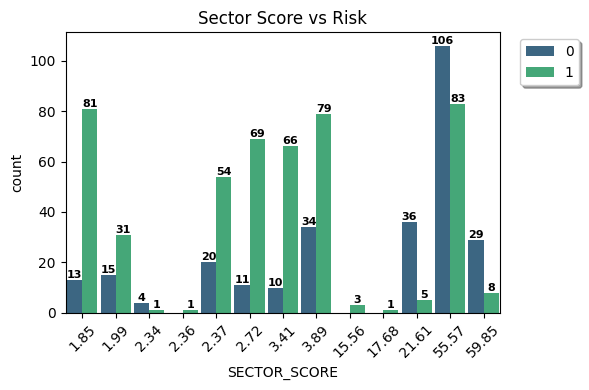

In [41]:
plt.figure(figsize=(6, 4))
bar_width = 0.9

ax = sns.countplot(x='SECTOR_SCORE', data=final_df[['SECTOR_SCORE', 'RISK']],
                   hue='RISK', palette='viridis', width=bar_width)

ax.set_title('Sector Score vs Risk')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, fontweight='bold')

plt.xticks(rotation = 45)

plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left', fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

**Plotting of Risk for location_id**

The plot depicts which attributes of sector score which represents the highest and lowest risk. It can be observed that the risk is 1 for location with id 8,23,2, and 16

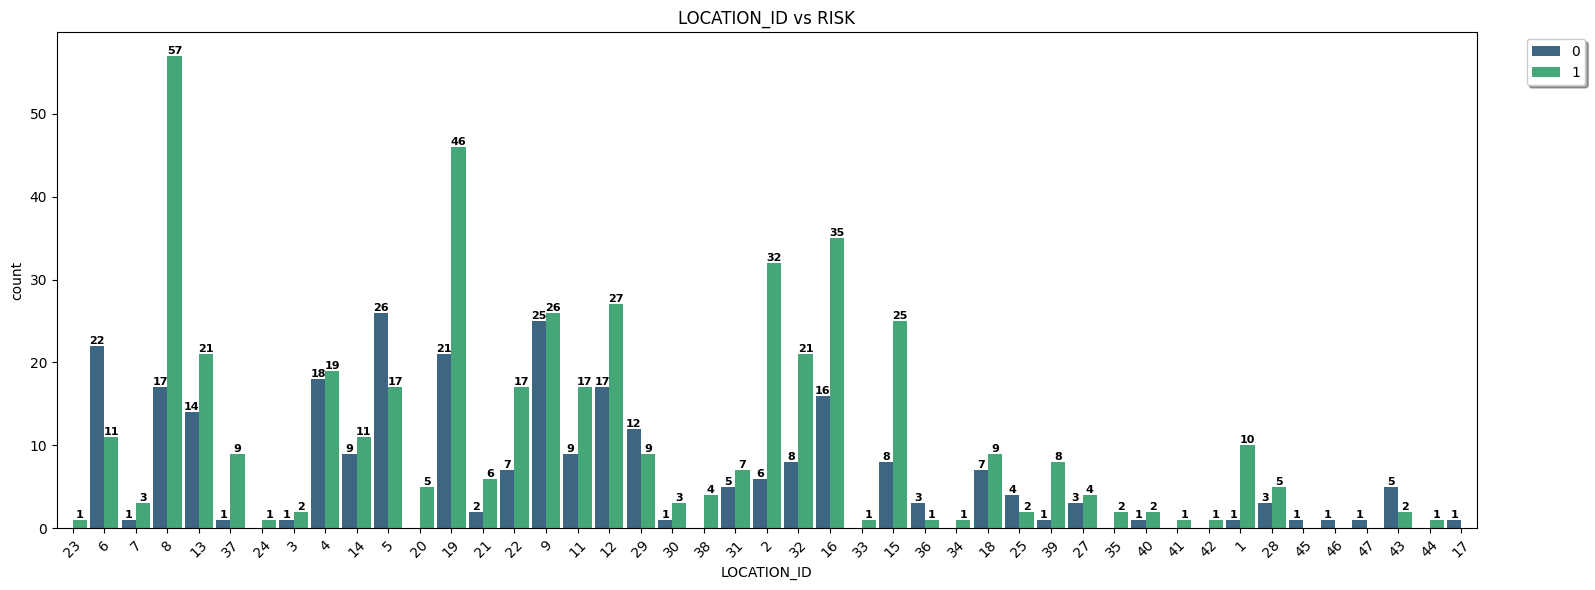

In [42]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x='LOCATION_ID', data=final_df[['LOCATION_ID', 'RISK']],
                   hue='RISK', palette='viridis', width=bar_width)

ax.set_title('LOCATION_ID vs RISK')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, fontweight='bold')

plt.xticks(rotation = 45)

plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left', fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

**Plot for History vs Risk**

It is observed that for the zero history the risk is less i.e., risk is zero,

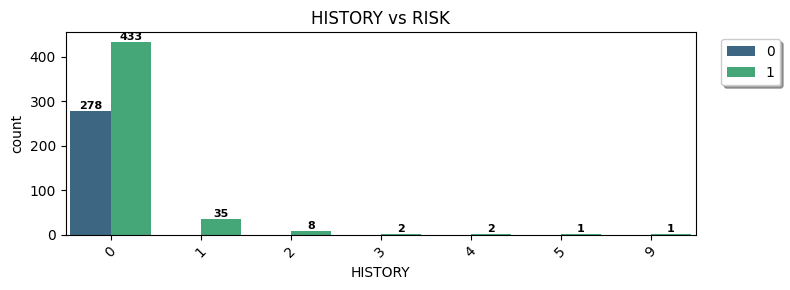

In [43]:
plt.figure(figsize=(8, 3))

ax = sns.countplot(x='HISTORY', data=final_df[['HISTORY', 'RISK']],
                   hue='RISK', palette='viridis', width=bar_width)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, fontweight='bold')

ax.set_title('HISTORY vs RISK')
plt.xticks(rotation = 45)

plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left', fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

**Plot for District-LOSS vs Risk**

It is observed that the District-loss =2 has less risk as risk=0.

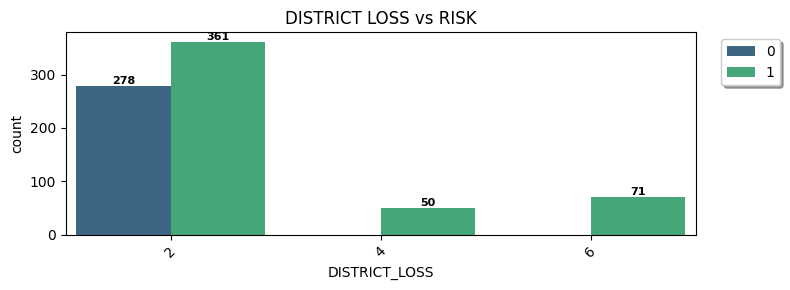

In [44]:
plt.figure(figsize=(8, 3))

ax = sns.countplot(x='DISTRICT_LOSS', data=final_df[['DISTRICT_LOSS', 'RISK']],
                   hue='RISK', palette='viridis', width=bar_width)

ax.set_title('DISTRICT LOSS vs RISK')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, fontweight='bold')

plt.xticks(rotation = 45)

plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left', fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

**Plot for numbers and risk**

Here numbers refers to number of transactions. Here the risk=0 for numbers of transactions =5.

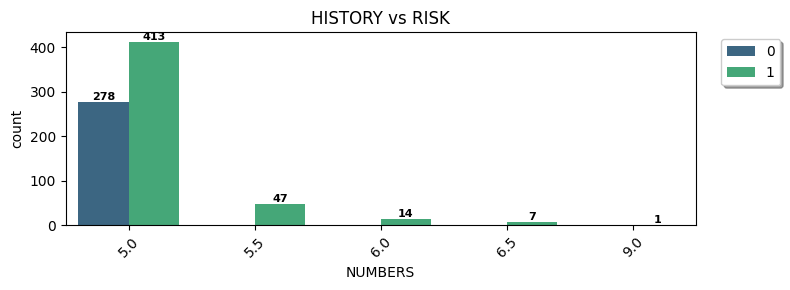

In [45]:
plt.figure(figsize=(8, 3))

ax = sns.countplot(x='NUMBERS', data=final_df[['NUMBERS', 'RISK']],
                   hue='RISK', palette='viridis')

ax.set_title('NUMBERS vs RISK')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, fontweight='bold')

ax.set_title('HISTORY vs RISK')
plt.xticks(rotation = 45)

plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left', fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

**Plot for Risk percentage**

It is observed that the value_counts for risk=0 and risk=1 are in the same degree. So it can be said that there is no class imbalance problem.

**Scatter plot the correlation between Audit_Risk and Inherent_Risk for risk=1 and risk=0**

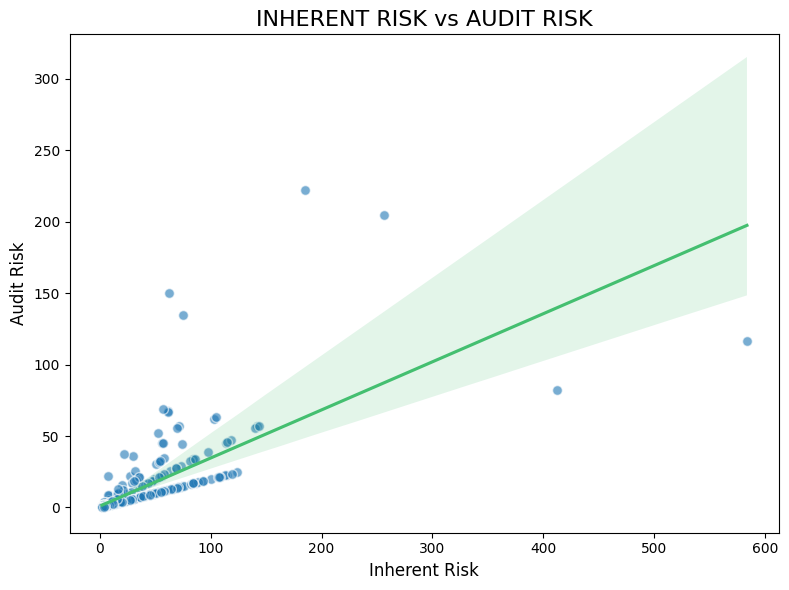

In [46]:
plt.figure(figsize=(8, 6))

palette = sns.color_palette('viridis', as_cmap=True)
color = palette(0.7)

plot1 = sns.regplot(x="INHERENT_RISK", y="AUDIT_RISK",
                    data=final_df[final_df["RISK"] == 1],
                    scatter=True,
                    line_kws={'color': color},
                    scatter_kws={'s': 50, 'alpha': 0.6, 'edgecolor': 'w'})

plot1.set_title("INHERENT RISK vs AUDIT RISK", fontsize=16)
plot1.set_xlabel("Inherent Risk", fontsize=12)
plot1.set_ylabel("Audit Risk", fontsize=12)

plt.tight_layout()
plt.show()

Here it is observed from the above plot that there is good linear-correlation between INHERENT_RISK and AUDIT_RISK when RISK=1

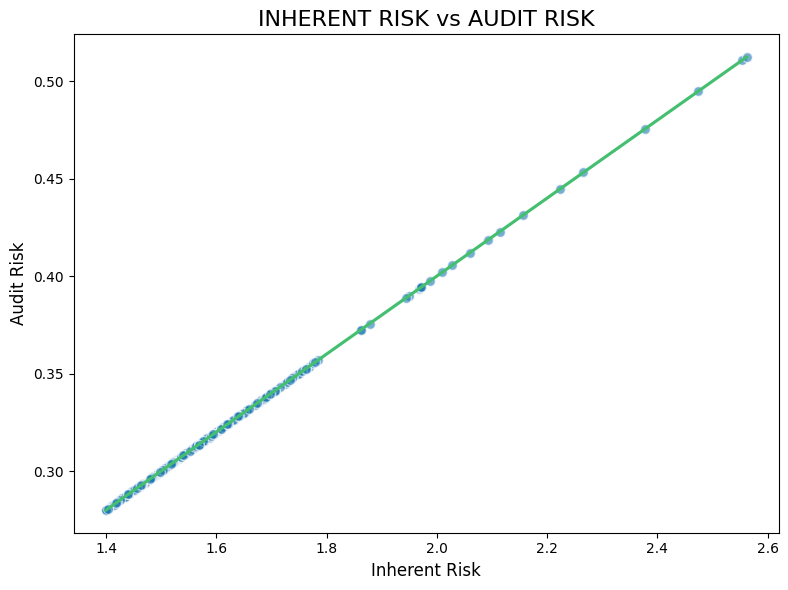

In [47]:
plt.figure(figsize=(8, 6))

palette = sns.color_palette('viridis', as_cmap=True)
color = palette(0.7)

plot2 = sns.regplot(x="INHERENT_RISK", y="AUDIT_RISK",
                    data=final_df[final_df["RISK"] == 0],
                    scatter=True,
                    line_kws={'color': color},
                    scatter_kws={'s': 50, 'alpha': 0.6, 'edgecolor': 'w'})

plot2.set_title("INHERENT RISK vs AUDIT RISK", fontsize=16)
plot2.set_xlabel("Inherent Risk", fontsize=12)
plot2.set_ylabel("Audit Risk", fontsize=12)


plt.tight_layout()
plt.show()

Here it is observed that the linear correlation between INHERENT_RISK and AUDIT_RISK when RISK=0 is not so good.

From the above plots it is can be concluded that, INHERENT_RISK above 3.5 the risk is high which is 1. The distribution is also different for risk=0 and risk=1.

**Average SECTOR SCORE by LOCATION ID**

In [49]:
pivot_sector_location = final_df.pivot_table(
    index='LOCATION_ID',
    values='SECTOR_SCORE',
    aggfunc='mean'
).reset_index()

pivot_sector_location.sample(2)

,LOCATION_ID,SECTOR_SCORE
31,37,14.13
36,41,3.41


**Potential Trends by LOCATION_ID:**

***Increasing/Decreasing Patterns: ***

By looking at the LOCATION_ID order, there doesn't seem to be a clear increasing or decreasing pattern in the scores. The scores are more varied and do not show a simple trend over the sequence of LOCATION_IDs.

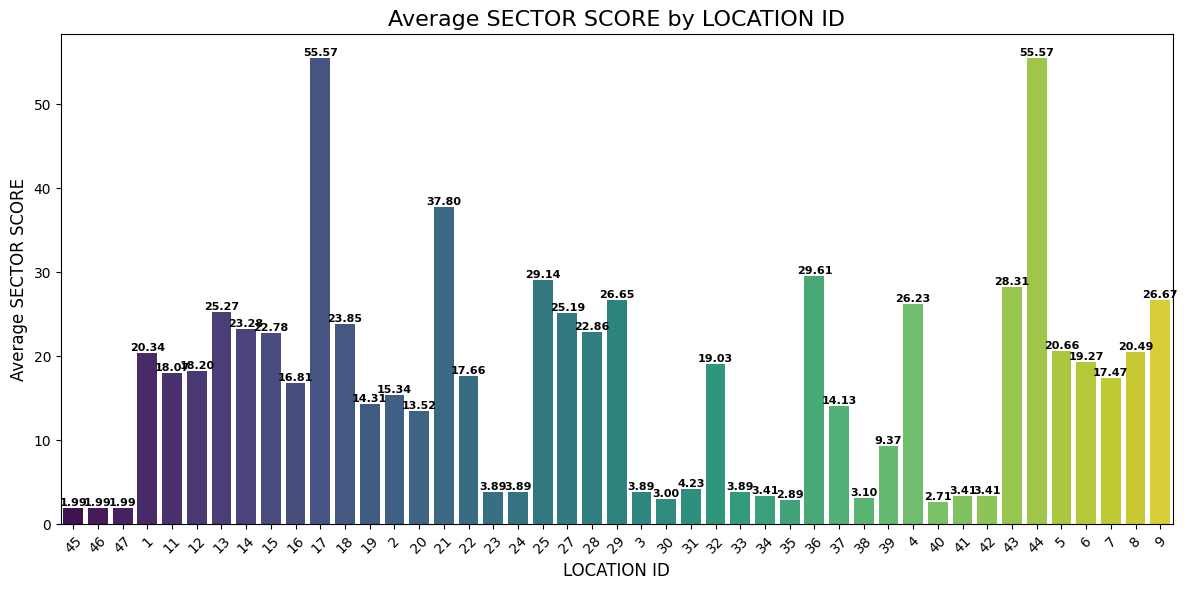

In [50]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(x='LOCATION_ID', y='SECTOR_SCORE', data=pivot_sector_location, hue='LOCATION_ID', palette='viridis', legend=False)

ax.set_title('Average SECTOR SCORE by LOCATION ID', fontsize=16)
ax.set_xlabel('LOCATION ID', fontsize=12)
ax.set_ylabel('Average SECTOR SCORE', fontsize=12)
ax.tick_params(axis='x', rotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

**Average TOTAL by LOCATION ID and RISKA And RISK B**

In [51]:
pivot_avg_money_district = final_df.pivot_table(
    index='DISTRICT_LOSS',
    values='MONEY_VALUE',
    aggfunc='mean'
).reset_index()

pivot_avg_money_district

,DISTRICT_LOSS,MONEY_VALUE
0,2,11.119144
1,4,10.149000
2,6,21.411268


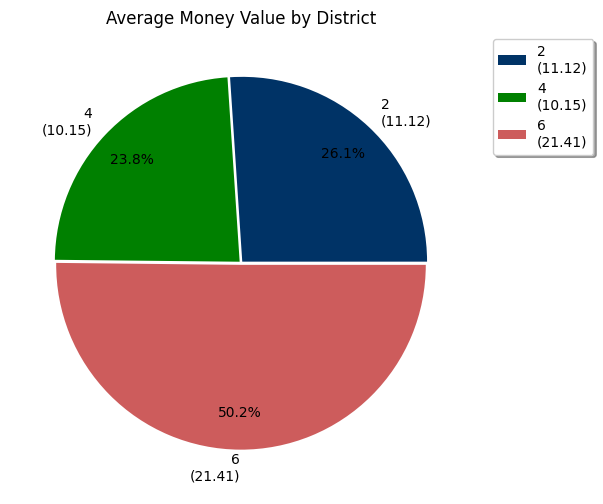

In [54]:
colors = ['#003366','#008000','#CD5C5C']

labels = pivot_avg_money_district['DISTRICT_LOSS']
sizes = pivot_avg_money_district['MONEY_VALUE']

labels_with_counts = [f'{label}\n({size:.2f})' for label, size in zip(labels, sizes)]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels_with_counts, autopct='%1.1f%%', startangle = 360, colors=colors, explode=[0.01] * len(labels), pctdistance=0.8)
plt.title('Average Money Value by District')

plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left', fancybox=True, shadow=True)

plt.show()

**Average SCORE B by HISTORY**

In [70]:
score_history = final_df.pivot_table(
    index='HISTORY',
    values='SCORE_B',
    aggfunc='mean'
).reset_index().round(2)

score_history

,HISTORY,SCORE_B
0,0,2.99
1,1,5.31
2,2,6.00
3,3,6.00
4,4,2.00
5,5,6.00
6,9,2.00


<ipython-input-71-a255c7a49dbd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='HISTORY', y='SCORE_B', data=score_history, palette='viridis')


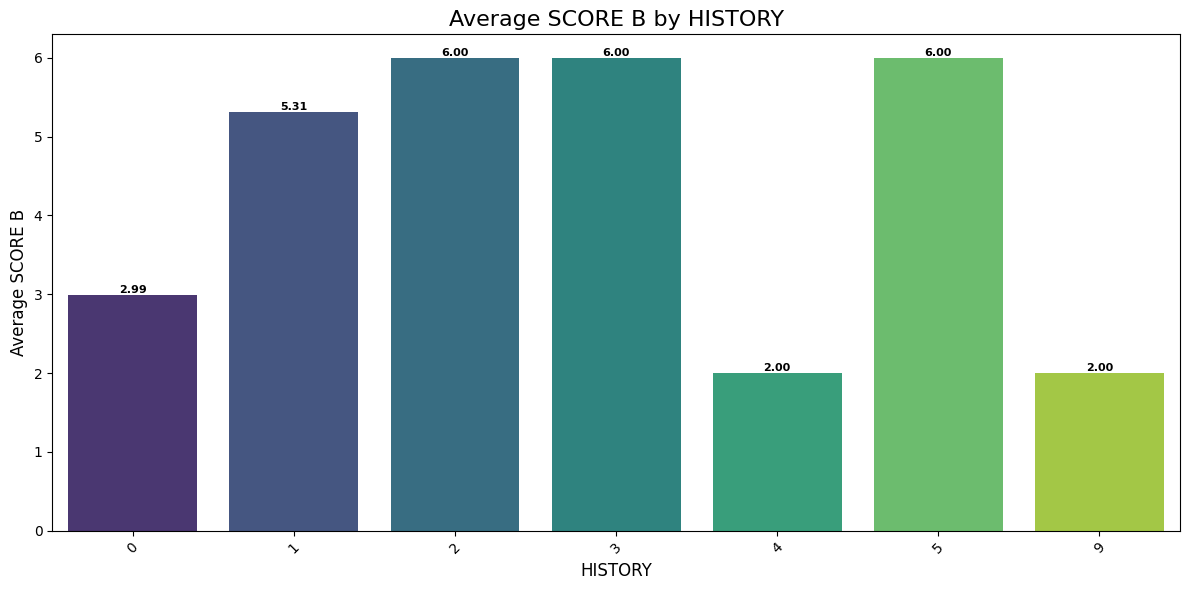

In [71]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(x='HISTORY', y='SCORE_B', data=score_history, palette='viridis')

ax.set_title('Average SCORE B by HISTORY', fontsize=16)
ax.set_xlabel('HISTORY', fontsize=12)
ax.set_ylabel('Average SCORE B', fontsize=12)

ax.tick_params(axis='x', rotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

**Key Observations:**

**Score Metrics:**

**SECTOR_SCORE:** Mean of approximately 19.79 with a high standard deviation (24.16), indicating a wide range of sector scores.

**SCORE_A and SCORE_B:** Mean values are 3.53 and 3.14, respectively. Both have relatively lower standard deviations compared to SECTOR_SCORE, suggesting less variability.
Risk Metrics:

**RISK_A, RISK_B, RISK_C, RISK_D, RISK_E, RISK_F:** These metrics have relatively low mean values and low variability. The maximum values are much higher than the 75th percentile values, indicating that high-risk values are rare but significant.
Financial and Loss Metrics:

**MONEY_VALUE and DISTRICT_LOSS:** These have large ranges and high mean values, suggesting significant financial impact and loss.
TOTAL: Mean is 11.54 with a wide range, indicating variability in the total metric.

**Probabilities:**

**PROB1 and PROB:** The mean values are low with very low variability, suggesting that the probabilities are generally low and consistent.

**Trends and Insights:**

**High Variability in Scores:**

SECTOR_SCORE exhibits high variability, implying that sector scores can vary significantly across different entries. This could indicate differences in sector performance or reporting.

**Consistency in Risk Metrics:**

The risk metrics (A through F) show that most entries have low risk values, with significant outliers. This might suggest that while most entities face low risk, there are a few that experience high risk.

**Large Financial Impacts:**

The wide range and high mean values for financial metrics like MONEY_VALUE and DISTRICT_LOSS suggest that financial losses can be substantial and vary greatly.

**Probabilities Are Low:**

PROB1 and PROB are generally low and consistent, indicating that the likelihood of certain events or outcomes is minimal across the dataset.

**Potential Outliers:**

SECTOR_SCORE, MONEY_VALUE, and DISTRICT_LOSS have high maximum values compared to their 75th percentile values, indicating the presence of significant outliers.

**Central Tendencies and Dispersions:**

SCORE_A and SCORE_B have relatively lower variability compared to SECTOR_SCORE, suggesting that these scores are more stable across the dataset.

**Possible Actions:**

**Further Analysis:** Investigate the entities or cases with extreme values in SECTOR_SCORE, MONEY_VALUE, and DISTRICT_LOSS to understand the reasons behind these outliers.

**Risk Management:** Analyze the distribution of risk metrics to develop targeted strategies for managing high-risk cases.

**Financial Planning:** Use the variability in financial metrics to forecast and prepare for potential large losses.